## Append the path of the module installed to sys ("use this when you get error Module not found even after installing package")

In [64]:
import sys
sys.path.append('/usr/local/lib64/python3.6/site-packages')
sys.path.append('/usr/local/lib/python3.6/site-packages')
sys.path.append('/usr/local/lib/python3.6/site-packages')

In [74]:
!sudo python3 -m pip install wordcloud

    100% |████████████████████████████████| 368kB 3.5MB/s eta 0:00:01
    100% |████████████████████████████████| 2.1MB 645kB/s eta 0:00:01
You are using pip version 9.0.3, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [45]:
!conda install --user https://conda.anaconda.org/conda-forge wordcloud

usage: conda [-h] [-V] command ...
conda: error: unrecognized arguments: --user


In [51]:
from w

ImportError: No module named 'wordcloud'

In [85]:
!sudo python3 -m pip uninstall Pillow
!y

Uninstalling Pillow-6.1.0:
  /usr/local/lib64/python3.6/site-packages/PIL/.libs/libfreetype-6d1da9cf.so.6.17.0
  /usr/local/lib64/python3.6/site-packages/PIL/.libs/libjpeg-3b10b538.so.9.3.0
  /usr/local/lib64/python3.6/site-packages/PIL/.libs/liblcms2-a6801db4.so.2.0.8
  /usr/local/lib64/python3.6/site-packages/PIL/.libs/liblzma-6cd627ed.so.5.2.4
  /usr/local/lib64/python3.6/site-packages/PIL/.libs/libopenjp2-b3d7668a.so.2.3.1
  /usr/local/lib64/python3.6/site-packages/PIL/.libs/libpng16-bedcb7ea.so.16.37.0
  /usr/local/lib64/python3.6/site-packages/PIL/.libs/libtiff-8267adfe.so.5.4.0
  /usr/local/lib64/python3.6/site-packages/PIL/.libs/libwebp-baad113c.so.7.0.4
  /usr/local/lib64/python3.6/site-packages/PIL/.libs/libwebpdemux-60cc0b6d.so.2.0.6
  /usr/local/lib64/python3.6/site-packages/PIL/.libs/libwebpmux-75695800.so.3.0.4
  /usr/local/lib64/python3.6/site-packages/PIL/.libs/libz-a147dcb0.so.1.2.3
  /usr/local/lib64/python3.6/site-packages/PIL/BdfFontFile.py
  /usr/local/lib64/python

Proceed (y/n)? ^C
Operation cancelled by user
You are using pip version 9.0.3, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
/bin/sh: y: command not found


In [ ]:
!python3 -m nltk.downloader stopwords

In [2]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
  


[nltk_data] Downloading package stopwords to /home/hadoop/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/hadoop/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!python3 -m pip install --user nltk

In [3]:
import sqlite3
import pandas as pd
import matplotlib
import urllib
#import lxml.html
#import urllib.parse
#from lxml.html import tostring, html5parser
import nltk
from nltk.tokenize import LineTokenizer
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

In [5]:
Pd_song_read= pd.read_csv('billboard_lyrics_1964-2015.csv',sep=',',quotechar='"',encoding='latin-1')

In [ ]:
Pd_song_read.info()

In [6]:
Pd_song_read['Lyrics'] = Pd_song_read['Lyrics'].astype('str') 

## removing extra characters from the lyrics 

In [7]:
Pd_song_read['Lyrics'] = [x.strip('/') for x in Pd_song_read['Lyrics']]

## dropping records having no lyrics

In [8]:
Pd_song_read = Pd_song_read[Pd_song_read['Lyrics']!='  ']

## dropping songs doesnt have lyrics and replaced with nan

In [9]:
Pd_song_read = Pd_song_read[Pd_song_read['Lyrics'] != 'nan']

## tokenizing the lyrics

In [10]:
def identify_tokens(row):
    Lyrics = row['Lyrics']
    tokens = nltk.tokenize.word_tokenize(Lyrics)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

#Pd_song_read['lr'] = Pd_song_read.apply(identify_tokens, axis=1)

In [11]:
Pd_song_read['lr'] = Pd_song_read.apply(identify_tokens, axis=1)

In [12]:
Pd_song_read

,Rank,Song,Artist,Year,Lyrics,Source,lr
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,"[sam, the, sham, miscellaneous, wooly, bully, ..."
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,"[sugar, pie, honey, bunch, you, know, that, i,..."
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,"[when, i, woke, up, this, morning, you, were, ..."
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0,"[you, never, close, your, eyes, anymore, when,..."
5,6,downtown,petula clark,1965,when youre alone and life is making you lonel...,1.0,"[when, youre, alone, and, life, is, making, yo..."
6,7,help,the beatles,1965,help i need somebody help not just anybody hel...,3.0,"[help, i, need, somebody, help, not, just, any..."
7,8,cant you hear my heart beat,hermans hermits,1965,carterlewis every time i see you lookin my way...,5.0,"[carterlewis, every, time, i, see, you, lookin..."
8,9,crying in the chapel,elvis presley,1965,you saw me crying in the chapel the tears i s...,1.0,"[you, saw, me, crying, in, the, chapel, the, t..."
9,10,my girl,the temptations,1965,ive got sunshine on a cloudy day when its cold...,3.0,"[ive, got, sunshine, on, a, cloudy, day, when,..."
10,11,help me rhonda,the beach boys,1965,well since she put me down i ve been out doin ...,3.0,"[well, since, she, put, me, down, i, ve, been,..."


## Removing Stop Words

In [149]:
stops = set(nltk.corpus.stopwords.words("english"))
t = ('ive','youre','verse','im','yo','oh','yea','ah','sham',
     'sam','mrs','yea','sloopy','hey','mr','woah','aint','yah'
    ,'uhuh','im', 'dont', 'know','just', 'got', 'yeah','make',
     'let','come','wanna','ill','aint','tell','ya','get', 'go', 
     'see', 'one', 'take', 'la','ooh','id','youll','na','theyll','ever','theres','youve')
stops.update(t)


def remove_stops(row):
    my_list = row['lr']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

Pd_song_read['stopword_lyrc'] = Pd_song_read.apply(remove_stops, axis=1)

In [150]:
stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ah',
 'ain',
 'aint',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'come',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'dont',
 'down',
 'during',
 'each',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'go',
 'got',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'hey',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'id',
 'if',
 'ill',
 'im',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'ive',
 'just',
 'know',
 'la',
 'let',
 'll',
 'm',
 'ma',
 'make',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mr',
 'mrs',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'na',
 'needn',
 "need

In [54]:
Pd_song_read

,Rank,Song,Artist,Year,Lyrics,Source,lr,stopword_lyrc
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,"[sam, the, sham, miscellaneous, wooly, bully, ...","[miscellaneous, wooly, bully, wooly, bully, ph..."
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,"[sugar, pie, honey, bunch, you, know, that, i,...","[sugar, pie, honey, bunch, know, love, cant, h..."
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,"[when, i, woke, up, this, morning, you, were, ...","[woke, morning, mind, mind, got, troubles, who..."
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0,"[you, never, close, your, eyes, anymore, when,...","[never, close, eyes, anymore, kiss, lips, ther..."
5,6,downtown,petula clark,1965,when youre alone and life is making you lonel...,1.0,"[when, youre, alone, and, life, is, making, yo...","[alone, life, making, lonely, always, go, down..."
6,7,help,the beatles,1965,help i need somebody help not just anybody hel...,3.0,"[help, i, need, somebody, help, not, just, any...","[help, need, somebody, help, anybody, help, kn..."
7,8,cant you hear my heart beat,hermans hermits,1965,carterlewis every time i see you lookin my way...,5.0,"[carterlewis, every, time, i, see, you, lookin...","[carterlewis, every, time, see, lookin, way, b..."
8,9,crying in the chapel,elvis presley,1965,you saw me crying in the chapel the tears i s...,1.0,"[you, saw, me, crying, in, the, chapel, the, t...","[saw, crying, chapel, tears, shed, tears, joy,..."
9,10,my girl,the temptations,1965,ive got sunshine on a cloudy day when its cold...,3.0,"[ive, got, sunshine, on, a, cloudy, day, when,...","[got, sunshine, cloudy, day, cold, outside, go..."
10,11,help me rhonda,the beach boys,1965,well since she put me down i ve been out doin ...,3.0,"[well, since, she, put, me, down, i, ve, been,...","[well, since, put, doin, head, come, late, nig..."


## function for finding length of songs 

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)

df = pd.DataFrame(columns=('artist', 'words'))
i=0
for artist in Pd_song_read.Artist:
    f = Pd_song_read.stopword_lyrc
    num_words = 0
    all_text = ''
    for sentence in f:
        #this_sentence = sentence.decode('utf-8')
        num_words_this = len(sentence)
        #print(len(sentence))
        num_words += num_words_this


In [56]:
num_words

827673

## Removing stopwords from the Lyrics

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)

df = pd.DataFrame(columns=('artist', 'words'))
i=0
for artist in Pd_song_read.Artist:
    f = Pd_song_read.stopword_lyrc
    num_words = []
    all_text = ''
    for sentence in f:
        this_sentence = sentence
        num_words_this = len(this_sentence)
        num_words.append(num_words_this) 
     
    df.loc[i] = (artist)
    i+=1

In [16]:
df['words'] = num_words


## Statistic showing number of words used by each artist in the songs

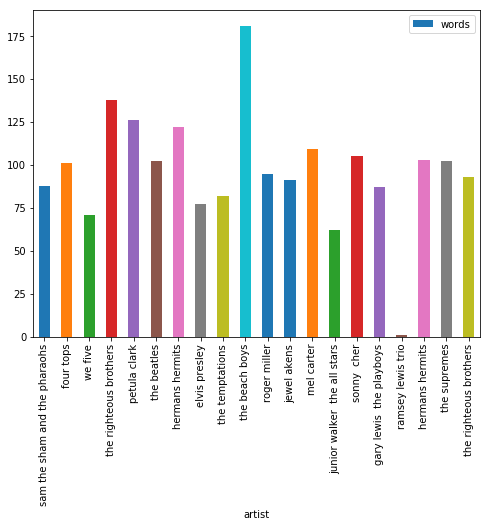

In [18]:
plt.style.use(['fast'])
df.head(20).plot.bar(x='artist',y='words',style='seaborn-talk')
plt.show()

In [ ]:
#adding list to dataframe as column  

In [24]:
plt.rcParams['figure.figsize'] = (50,60)

In [19]:
df['Rank'] = Pd_song_read['Rank']

In [20]:
df['Year'] = (Pd_song_read['Year'])

In [ ]:
#Joining all the lyrics of songs without stop words

In [ ]:
#long_string = ','.join(list(Pd_song_read['Lyrics'].values))

In [22]:
long_string = ''.join(list(str(Pd_song_read['stopword_lyrc'].values)))

In [ ]:
#Word Cloud library to create cloud of words 

In [32]:
!python3 -m pip install --user wordcloud

You are using pip version 9.0.3, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [79]:
!python3 --version

Python 3.6.8


In [77]:
import wordcloud

ImportError: cannot import name '_imaging'

In [31]:
!python3 -m pip install --user wordcloud

You are using pip version 9.0.3, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [66]:
!python3 -m pip install --user seaborn

You are using pip version 9.0.3, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


ImportError: No module named 'wordcloud'

ImportError: No module named 'PIL'

In [89]:
!python3 -m pip install --user wordcloud

You are using pip version 9.0.3, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [28]:
wordcloud = wordcloud.(background_color="white", max_words=2000, contour_width=5, contour_color='steelblue',width=600,height=800)



NameError: name 'wordcloud' is not defined

In [40]:
import wordcloud

ImportError: No module named 'wordcloud'

In [14]:

# Generate a word cloud
wordcloud.generate(long_string)


AttributeError: 'module' object has no attribute 'generate'

In [12]:
# Visualize the word cloud
wordcloud.to_image()

AttributeError: 'module' object has no attribute 'to_image'

In [71]:
!sudo python3 -m pip install seaborn

    100% |████████████████████████████████| 215kB 5.9MB/s eta 0:00:01
    100% |████████████████████████████████| 13.1MB 102kB/s eta 0:00:01
    100% |████████████████████████████████| 25.2MB 52kB/s  eta 0:00:01    40% |█████████████                   | 10.2MB 58.5MB/s eta 0:00:01
    100% |████████████████████████████████| 10.5MB 130kB/s eta 0:00:01  6% |██▏                             | 696kB 42.1MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/11/fa/0160cd525c62d7abd076a070ff02b2b94de589f1a9789774f17d7c54058e/pyparsing-2.4.2-py2.py3-none-any.whl
    100% |████████████████████████████████| 92kB 10.8MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/41/17/c62faccbfbd163c7f57f3844689e3a78bae1f403648a6afb1d0866d87fbb/python_dateutil-2.8.0-py2.py3-none-any.whl
You are using pip version 9.0.3

In [72]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import seaborn


In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [ ]:
#function to display top 30 comman words used in lyrics

In [186]:
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:50]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

In [143]:
Pd_song_read.head(3)

,Rank,Song,Artist,Year,Lyrics,Source,lr,stopword_lyrc
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,"[sam, the, sham, miscellaneous, wooly, bully, ...","[miscellaneous, wooly, bully, wooly, bully, ph..."
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,"[sugar, pie, honey, bunch, you, know, that, i,...","[sugar, pie, honey, bunch, love, cant, help, l..."
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,"[when, i, woke, up, this, morning, you, were, ...","[woke, morning, mind, mind, troubles, whoaoh, ..."


In [187]:
count_vectorizer = CountVectorizer(stop_words=stops)

In [188]:
Pd_song_read['Year'].unique()

array([1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [189]:
df_65_70= Pd_song_read[Pd_song_read['Year'].isin([1965,1966,1967,1968,1969,1970])]
df_71_75 = Pd_song_read[Pd_song_read['Year'].isin([1971,1972,1973,1974,1975])]
df_1967 =  Pd_song_read[Pd_song_read['Year']==1967]
df_1968 = Pd_song_read[Pd_song_read['Year']==1968]

In [196]:
count_65_70 = count_vectorizer.fit_transform(df_65_70['Lyrics'])

In [191]:
count_71_75 = count_vectorizer.fit_transform(df_71_75['Lyrics'])

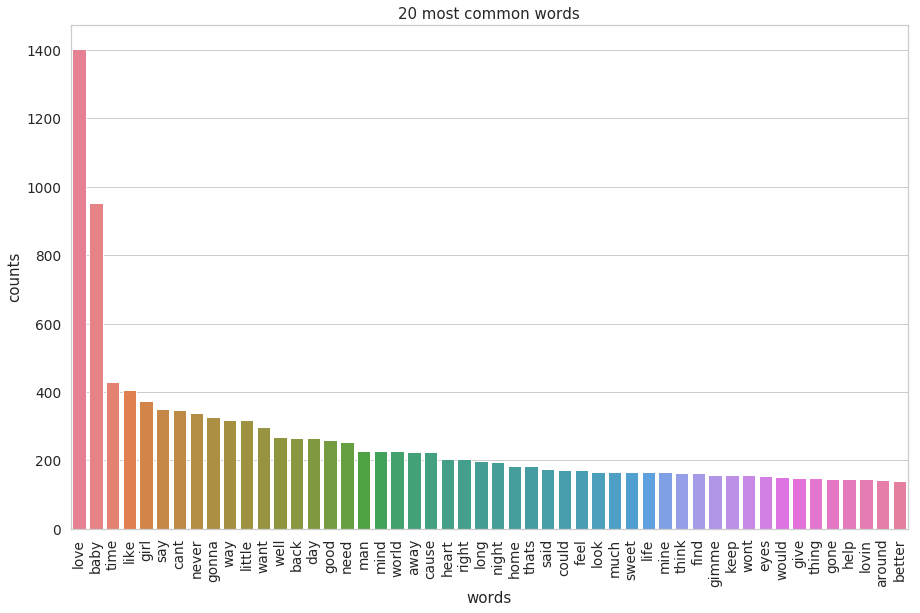

In [197]:
plot_10_most_common_words(count_65_70, count_vectorizer)

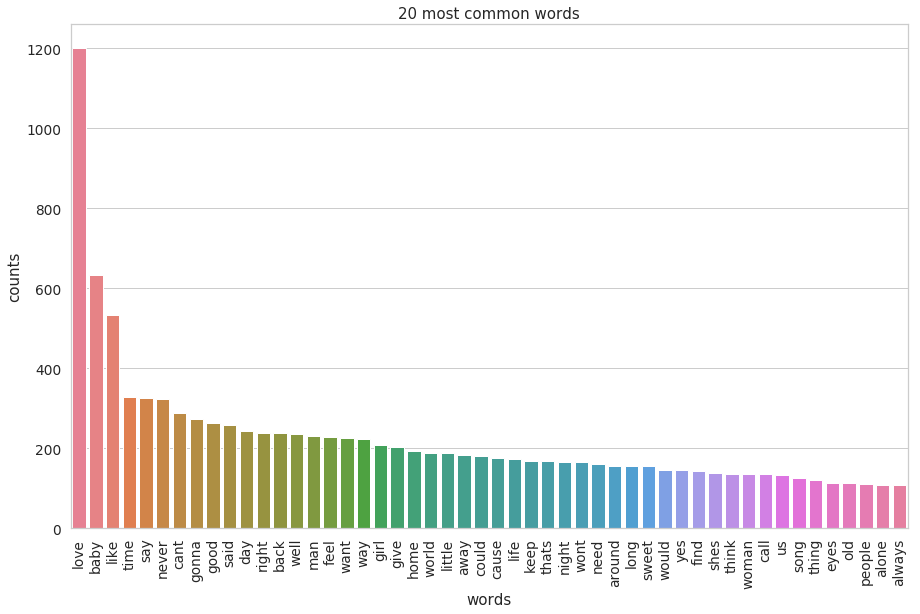

In [194]:
# Visualise the 10 most common words
plot_10_most_common_words(count_71_75, count_vectorizer)

In [ ]:
'ya','get', 'go', 'see', 'one', 'take', 'la','ooh','id','youll','na','theyll','ever','theres','youve'

'us','oo','us','hes','thats','mia','shes','yes'

In [ ]:
print(plt.style.available)

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('vader_lexicon')



In [ ]:
Pd_song_read.stopword_lyrc.iloc[0]

In [ ]:
Pd_song_read[Pd_song_read['Artist']=='the beach boys']

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

sentences=['sugar',
 'pie',
 'honey',
 'bunch',
 'know',
 'love',
 'cant',
 'help',
 'love',
 'nobody',
 'elsein',
 'life',
 'come',
 'go',
 'leaving',
 'picture',
 'behind',
 'kissed',
 'thousand',
 'timeswhen',
 'snap',
 'finger',
 'wink',
 'eye',
 'come',
 'arunning',
 'im',
 'tied',
 'apron',
 'strings',
 'theres',
 'nothing',
 'docant',
 'help',
 'cant',
 'help',
 'myselfsugar',
 'pie',
 'honey',
 'bunch',
 'im',
 'weaker',
 'man',
 'cant',
 'help',
 'im',
 'fool',
 'love',
 'seewanna',
 'tell',
 'dont',
 'love',
 'tell',
 'ive',
 'tried',
 'every',
 'time',
 'see',
 'face',
 'get',
 'choked',
 'insidewhen',
 'call',
 'name',
 'girl',
 'starts',
 'flame',
 'burning',
 'heart',
 'tearing',
 'apart',
 'matter',
 'try',
 'love',
 'hidecause',
 'sugar',
 'pie',
 'honey',
 'bunch',
 'know',
 'im',
 'weak',
 'cant',
 'help',
 'love',
 'nobody',
 'elsesugar',
 'pie',
 'honey',
 'bunch',
 'anything',
 'ask',
 'cant',
 'help',
 'want',
 'nobody',
 'elsesugar',
 'pie',
 'honey',
 'bunch',
 'know',
 'love',
 'cant',
 'help',
 'cant',
 'help']
for sentence in sentences:
    ss = sid.polarity_scores(sentence) 
print (ss)


In [ ]:
#Using nltk check how much percentage of the lyrics of song is positive, negative and neutral

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
df = pd.DataFrame(columns=('artist', 'pos', 'neu', 'neg'))
sid = SentimentIntensityAnalyzer()
i=0
for artist in artists:
    num_positive = 0
    num_negative = 0
    num_neutral = 0

    f = open('lyrics/' + artist + '-cleaned', 'rb')
    for sentence in f.readlines():
        this_sentence = sentence.decode('utf-8')
        comp = sid.polarity_scores(this_sentence)
        comp = comp['compound']
        if comp >= 0.5:
            num_positive += 1
        elif comp > -0.5 and comp < 0.5:
            num_neutral += 1
        else:
            num_negative += 1

    num_total = num_negative + num_neutral + num_positive
    percent_negative = (num_negative/float(num_total))*100
    percent_neutral = (num_neutral/float(num_total))*100
    percent_positive = (num_positive/float(num_total))*100
    df.loc[i] = (artist, percent_positive, percent_neutral, percent_negative)
    i+=1
                 
df.plot.bar(x='artist', stacked=True)
plt.show()          

In [ ]:
comp.keys()

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
pdf_Label = pd.DataFrame(columns=('artist', 'pos', 'neu', 'neg'))
sid = SentimentIntensityAnalyzer()
i=0
num_positive = 0
num_negative = 0
num_neutral = 0
comp1 = []
for artist in Pd_song_read.Artist.head(500):
    f = Pd_song_read.Lyrics.head(500)
    for sentence in f:
        this_sentence = sentence
        #print(this_sentence)
        comp = sid.polarity_scores(this_sentence)
        comp1.append(comp)
    
      
    
    pdf_Label.loc[i] = (artist)
    i+=1
    
    
#pdf_Label.plot.bar(x='artist', stacked=True)
#plt.show()  
    
        
        #print(num_positive)
        #num_total = num_negative + num_neutral + num_positive
        #print(num_total)
        
        
        
        
    
    
            
            
    

In [ ]:
!pip install holoviews

In [ ]:
#converting list to Pandas Dataframe

In [ ]:
NEW = pd.DataFrame(comp1)

In [ ]:
pdf_Label['neg'] = NEW['neg']
pdf_Label['pos'] = NEW['pos']
#pdf_Label['neu'] = NEW['neu']
#pdf_Label['compound'] = NEW['compound']    

In [ ]:
pdf_Label.count()

In [ ]:
from bokeh.io import show, output_file
from bokeh.plotting import figure

In [ ]:
bars = hv.Bars(pdf_Label)


In [ ]:
pd.

In [ ]:
pdf_Label.plot.bar(x='artist',stacked=True, figsize=(10,7))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.barplot(x=pdf_Label.artist,y=pdf_Label.neu)

In [ ]:
pdf_Label.plot.bar(x='artist', stacked=True,)
plt.show()

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
pdf_Label = pd.DataFrame(columns=('artist', 'pos', 'neu', 'neg'))
sid = SentimentIntensityAnalyzer()
i=0
num_positive = 0
num_negative = 0
num_neutral = 0
for artist in Pd_song_read.Artist.head(50):
    f = Pd_song_read.Lyrics.head(50)
    for sentence in f:
        this_sentence = sentence
        #print(this_sentence)
        comp = sid.polarity_scores(this_sentence)
        
        comp1 = comp['compound']
        if comp1 >= 0.5:
            num_positive += 1
        elif comp1 > -0.5 and comp1 < 0.5:
            num_neutral += 1
        else:
            num_negative += 1
   
    print(artist,num_negative,num_neutral,num_positive)
    num_total = num_negative + num_neutral + num_positive
    print(num_total)
    percent_negative = (num_negative/(num_total))*100
    print(percent_negative)
    percent_neutral = (num_neutral/float(num_total))*100
    percent_positive = (num_positive/float(num_total))*100
    #print(artist,percent_negative,percent_negative,percent_positive)
    pdf_Label.loc[i] = (artist, num_positive, num_neutral, num_negative)
    i+=1
    
    
pdf_Label.plot.bar(x='artist', stacked=True)
plt.show()  
    
        
        #print(num_positive)
        #num_total = num_negative + num_neutral + num_positive
        #print(num_total)
        
        
        
        
    
    
            

In [ ]:
(12/60)*100

In [ ]:
pdf_Label

In [ ]:
for artist in Pd_song_read.Artist.head(10):
    print(artist)

In [ ]:
this_sentence

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
pdf_Label = pd.DataFrame(columns=('artist', 'pos', 'neu', 'neg'))
sid = SentimentIntensityAnalyzer()
i=0
for artist in Pd_song_read.Artist:
    num_positive = 0
    num_negative = 0
    num_neutral = 0
    
    f = Pd_song_read.Lyrics
    for sentence in f:
        this_sentence = sentence
        comp = sid.polarity_scores(this_sentence)
        comp = comp['compound']
        if comp >= 0.5:
            num_positive += 1
        elif comp > -0.5 and comp < 0.5:
            num_neutral += 1
        else:
            num_negative += 1
            
    num_total = num_negative + num_neutral + num_positive
    percent_negative = (num_negative/float(num_total))*100
    percent_neutral = (num_neutral/float(num_total))*100
    percent_positive = (num_positive/float(num_total))*100
    pdf_Label.loc[i] = (artist, percent_positive, percent_neutral, percent_negative)
    i+=1
    
pdf_Label.head(20).plot.bar(x='artist', stacked=True)
plt.show()          


In [ ]:
num_positive=[]
for i in range(2):
    num_positive =+1

In [ ]:
num_positive

In [ ]:
num_words_this

In [ ]:
pdf_Label

In [ ]:
num_words

In [ ]:
for artist in artists:
    f = open('lyrics/' + artist + '-cleaned', 'rb')
    all_words = ''
    num_words = 0
    raw_text = ""
    for sentence in f.readlines():
        this_sentence = sentence.decode('utf-8')
        raw_text += this_sentence
            
    words = raw_text.split(" ")
    filtered_words = [word for word in words if word not in stopwords.words('english') and len(word) > 1 and word not in ['na','la']] # remove the stopwords
    
    a = len(set(filtered_words))
    b = len(words)
    df.loc[i] = (artist, (a/float(b))*100)
    i+=1
    


## Reading dataset with Genre

In [347]:
Lyrics_Genre = pd.read_csv('lyrics 3.csv')

In [348]:
lyric_filtered = Lyrics_Genre.head(20000)

In [349]:
lyric_filtered.head(2)

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."


In [350]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [351]:
lyric_filtered['lyrics'] = [x.strip('.\n') for x in lyric_filtered['lyrics'].astype('str')]

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [352]:
lyric_filtered.drop(columns=['index'],inplace=True)

/opt/conda/lib/python3.5/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [353]:
lyric_filtered['llr'] = lyric_filtered['lyrics'].str.lower()

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [354]:
lyric_filtered.head()

,song,year,artist,genre,lyrics,llr
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...","oh baby, how you doing?\nyou know i'm gonna cu..."
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...","playin' everything so easy,\nit's like you see..."
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,if you search\nfor tenderness\nit isn't hard t...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...","oh oh oh i, oh oh oh i\n[verse 1:]\nif i wrote..."
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...","party the people, the people the party it's po..."


In [ ]:
#Tokenizing

In [355]:
lyric_filtered['lyrics'] = lyric_filtered['lyrics'].str.replace('[^\w\s\n]','')

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [356]:

lyric_filtered['lyrics'] = lyric_filtered['lyrics'].str.replace('\d+','')

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [357]:
lyric_filtered['lyrics'] = lyric_filtered['lyrics'].str.strip('\n')

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [358]:
def identify_tokens(row):
    Lyrics = row['lyrics']
    tokens = nltk.word_tokenize(Lyrics)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

lyric_filtered['lyrics'] = lyric_filtered.apply(identify_tokens, axis=1)

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [360]:
lyric_filtered.head()

,song,year,artist,genre,lyrics,llr
0,ego-remix,2009,beyonce-knowles,Pop,"[Oh, baby, how, you, doing, You, know, Im, gon...","oh baby, how you doing?\nyou know i'm gonna cu..."
1,then-tell-me,2009,beyonce-knowles,Pop,"[playin, everything, so, easy, its, like, you,...","playin' everything so easy,\nit's like you see..."
2,honesty,2009,beyonce-knowles,Pop,"[If, you, search, For, tenderness, It, isnt, h...",if you search\nfor tenderness\nit isn't hard t...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"[Oh, oh, oh, I, oh, oh, oh, I, Verse, If, I, w...","oh oh oh i, oh oh oh i\n[verse 1:]\nif i wrote..."
4,black-culture,2009,beyonce-knowles,Pop,"[Party, the, people, the, people, the, party, ...","party the people, the people the party it's po..."


In [373]:
stops = set(nltk.corpus.stopwords.words("english"))
t = ('ive','youre','verse','im','yo','oh','Oh','yea','ah','sham','If','For','Then','It','isnt','Im'
     'sam','mrs','yea','sloopy','hey','mr','woah','aint','yah','Verse'
    ,'uhuh','im', 'dont', 'know','just', 'got', 'yeah','make',
     'let','come','wanna','ill','aint','tell','ya','get', 'go', 
     'see', 'one', 'take', 'la','ooh','id','youll','na','theyll','ever','theres','youve','I','Ay','Hello','hello'
    'ca','is','the')
stops.update(t)


def remove_stops(row):
    my_list = row['lyrics']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

lyric_filtered['lyrics'] = lyric_filtered.apply(remove_stops, axis=1)

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [374]:
lyric_filtered.head()

,song,year,artist,genre,lyrics,llr
0,ego-remix,2009,beyonce-knowles,Pop,"[baby, You, Im, gon, cut, right, chase, Some, ...","[h, , b, b, ,, , h, w, , u, , n, g, ?, \n,..."
1,then-tell-me,2009,beyonce-knowles,Pop,"[playin, everything, easy, like, seem, sure, s...","[p, l, n, ', , e, v, e, r, h, n, g, , , e, ..."
2,honesty,2009,beyonce-knowles,Pop,"[search, tenderness, hard, find, You, love, Yo...","[f, , u, , e, r, c, h, \n, f, r, , e, n, e,..."
3,you-are-my-rock,2009,beyonce-knowles,Pop,"[wrote, book, stand, title, book, would, Life,...","[h, , h, , h, , ,, , h, , h, , h, , \n,..."
4,black-culture,2009,beyonce-knowles,Pop,"[Party, people, people, party, popping, sittin...","[p, r, , h, e, , p, e, p, l, e, ,, , h, e, ..."


In [ ]:
# Lyrics with Genre

In [375]:
Lyrics_Genre.dropna(inplace = True)

In [376]:
lyric_more = lyric_filtered[lyric_filtered['lyrics'].str.len() >= 20]

In [388]:
lyric_more.to_csv('CleanedData.csv')

In [389]:
pd.read_csv('CleanedData.csv')

,Unnamed: 0,song,year,artist,genre,lyrics,llr
0,0,ego-remix,2009,beyonce-knowles,Pop,"['baby', 'You', 'Im', 'gon', 'cut', 'right', '...","['h', ' ', 'b', 'b', ',', ' ', 'h', 'w', ' ', ..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"['playin', 'everything', 'easy', 'like', 'seem...","['p', 'l', 'n', ""'"", ' ', 'e', 'v', 'e', 'r', ..."
2,2,honesty,2009,beyonce-knowles,Pop,"['search', 'tenderness', 'hard', 'find', 'You'...","['f', ' ', 'u', ' ', 'e', 'r', 'c', 'h', '\n',..."
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"['wrote', 'book', 'stand', 'title', 'book', 'w...","['h', ' ', 'h', ' ', 'h', ' ', ',', ' ', 'h', ..."
4,4,black-culture,2009,beyonce-knowles,Pop,"['Party', 'people', 'people', 'party', 'poppin...","['p', 'r', ' ', 'h', 'e', ' ', 'p', 'e', 'p', ..."
5,5,all-i-could-do-was-cry,2009,beyonce-knowles,Pop,"['heard', 'Church', 'bells', 'ringing', 'heard...","[' ', 'h', 'e', 'r', '\n', 'c', 'h', 'u', 'r',..."
6,6,once-in-a-lifetime,2009,beyonce-knowles,Pop,"['This', 'another', 'day', 'would', 'spend', '...","['h', ' ', ' ', 'j', 'u', ' ', 'n', 'h', 'e', ..."
7,7,waiting,2009,beyonce-knowles,Pop,"['Waiting', 'waiting', 'waiting', 'waiting', '...","['w', 'n', 'g', ',', ' ', 'w', 'n', 'g', ',', ..."
8,8,slow-love,2009,beyonce-knowles,Pop,"['read', 'magazines', 'waiting', 'around', 'sa...","['[', 'v', 'e', 'r', 'e', ' ', '1', ':', ']', ..."
9,9,why-don-t-you-love-me,2009,beyonce-knowles,Pop,"['Nnnow', 'honey', 'You', 'better', 'sit', 'lo...","['n', '-', 'n', '-', 'n', 'w', ',', ' ', 'h', ..."


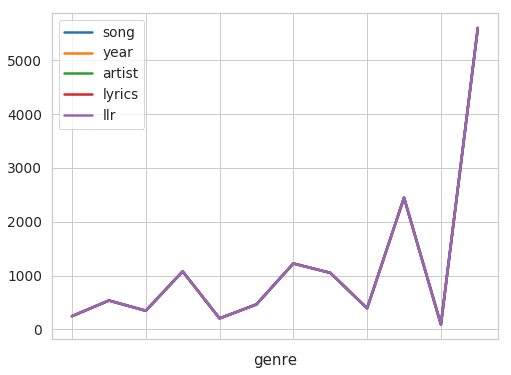

In [394]:
lyric_more.groupby(['genre']).count().plot()

In [344]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [385]:
def identify_stems(row):
    Lyrics = row['lyrics']
    stem_sentence=[]
    for word in Lyrics:
        stem_sentence.append(PorterStemmer.stem(word))
        stem_sentence.append(" ")
    # taken only words (not punctuation)
    return "".join(stem_sentence)


In [386]:
identify_stems(lyric_filtered)

TypeError: stem() missing 1 required positional argument: 'word'

In [ ]:
# keep songs have lyrics more than 10
#Taking length of words


In [277]:
songs$lyrics <- removePunctuation(songs$lyrics)
songs$lyrics <- removeNumbers(songs$lyrics)
songs$lyrics <- stripWhitespace(songs$lyrics)
songs$lyrics <- removeWords(songs$lyrics, stopwords)
songs$lyrics <- stemDocument(songs$lyrics)

SyntaxError: invalid syntax (<ipython-input-277-083f1e719b85>, line 1)

In [300]:
lyric_filtered

,song,year,artist,genre,lyrics,lr
0,ego-remix,2009,beyonce-knowles,Pop,NaN,<map object at 0x7f44d0d22a20>
1,then-tell-me,2009,beyonce-knowles,Pop,NaN,<map object at 0x7f44d0d22a20>
2,honesty,2009,beyonce-knowles,Pop,NaN,<map object at 0x7f44d0d22a20>
3,you-are-my-rock,2009,beyonce-knowles,Pop,NaN,<map object at 0x7f44d0d22a20>
4,black-culture,2009,beyonce-knowles,Pop,NaN,<map object at 0x7f44d0d22a20>
5,all-i-could-do-was-cry,2009,beyonce-knowles,Pop,NaN,<map object at 0x7f44d0d22a20>
6,once-in-a-lifetime,2009,beyonce-knowles,Pop,NaN,<map object at 0x7f44d0d22a20>
7,waiting,2009,beyonce-knowles,Pop,NaN,<map object at 0x7f44d0d22a20>
8,slow-love,2009,beyonce-knowles,Pop,NaN,<map object at 0x7f44d0d22a20>
9,why-don-t-you-love-me,2009,beyonce-knowles,Pop,NaN,<map object at 0x7f44d0d22a20>


In [278]:
lyric_filtered['lyrics'] = lyric_filtered['lyrics'].str.lower


/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [281]:
lyric_filtered

,song,year,artist,genre,lyrics,lr
0,ego-remix,2009,beyonce-knowles,Pop,NaN,<map object at 0x7f44d9e1c588>
1,then-tell-me,2009,beyonce-knowles,Pop,NaN,<map object at 0x7f44d9e1c588>
2,honesty,2009,beyonce-knowles,Pop,NaN,<map object at 0x7f44d9e1c588>
3,you-are-my-rock,2009,beyonce-knowles,Pop,NaN,<map object at 0x7f44d9e1c588>
4,black-culture,2009,beyonce-knowles,Pop,NaN,<map object at 0x7f44d9e1c588>
5,all-i-could-do-was-cry,2009,beyonce-knowles,Pop,NaN,<map object at 0x7f44d9e1c588>
6,once-in-a-lifetime,2009,beyonce-knowles,Pop,NaN,<map object at 0x7f44d9e1c588>
7,waiting,2009,beyonce-knowles,Pop,NaN,<map object at 0x7f44d9e1c588>
8,slow-love,2009,beyonce-knowles,Pop,NaN,<map object at 0x7f44d9e1c588>
9,why-don-t-you-love-me,2009,beyonce-knowles,Pop,NaN,<map object at 0x7f44d9e1c588>


In [ ]:
lyric_filtered['lyrics'] = lyric_filtered['lyrics'].str.lower

In [203]:
df_lyr = pd.DataFrame(columns=('artist_lyr', 'words'))
i=0
for artist in lyric_filtered:
    f = lyric_filtered.lyrics
    num_words = []
    for sentence in f:
        this_sentence = sentence
        num_words_this = len(this_sentence)
        num_words.append(num_words_this) 
    
    df_lyr.loc[i] = (artist_lyr)
    i+=1

NameError: name 'artist_lyr' is not defined

In [ ]:
df_lyr
